In [59]:
import pandas as pd

data_set = pd.read_csv('data.csv')  

In [60]:
data_set1=data_set[data_set['Unnamed: 0'] < 25]

In [61]:
df1 = pd.DataFrame(data_set1,columns = ['Name','Wage','Value'])

In [62]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1['Wage'].replace('[/€,]',' ', regex=True).apply(value_to_float)
value = df1['Value'].replace('[/€,]',' ', regex=True).apply(value_to_float)
df1['Value'] = value
df1['Wage'] = wage

In [63]:
df1['Difference'] = df1['Value'] - df1['Wage']

In [64]:
print(df1)

                 Name      Wage        Value   Difference
0            L. Messi  565000.0  110500000.0  109935000.0
1   Cristiano Ronaldo  405000.0   77000000.0   76595000.0
2           Neymar Jr  290000.0  118500000.0  118210000.0
3              De Gea  260000.0   72000000.0   71740000.0
4        K. De Bruyne  355000.0  102000000.0  101645000.0
5           E. Hazard  340000.0   93000000.0   92660000.0
6           L. Modrić  420000.0   67000000.0   66580000.0
7           L. Suárez  455000.0   80000000.0   79545000.0
8        Sergio Ramos  380000.0   51000000.0   50620000.0
9            J. Oblak   94000.0   68000000.0   67906000.0
10     R. Lewandowski  205000.0   77000000.0   76795000.0
11           T. Kroos  355000.0   76500000.0   76145000.0
12           D. Godín  125000.0   44000000.0   43875000.0
13        David Silva  285000.0   60000000.0   59715000.0
14           N. Kanté  225000.0   63000000.0   62775000.0
15          P. Dybala  205000.0   89000000.0   88795000.0
16            

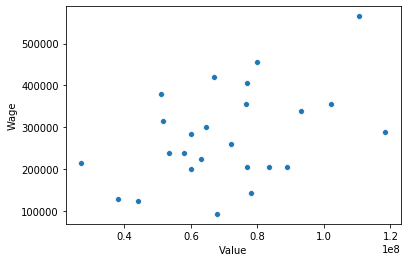

In [74]:
import seaborn as sns

sns.scatterplot(x="Value", y="Wage", data=df1);

In [83]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
])

p = figure(title="MyProj", x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700 , tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)

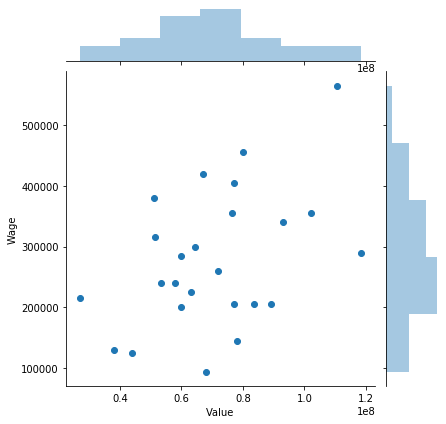